In [12]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df = pd.read_csv('data/case_dataset.csv')

df.columns.tolist()

['Unnamed: 0',
 'country_id',
 'age',
 'sex',
 'friends',
 'heavy_vk_platform',
 'vk_platforms_array',
 'days_in_vk',
 'avg_daily_ts',
 'days_in_feed',
 'avg_daily_ts_feed',
 'days_in_clips',
 'avg_daily_ts_clips',
 'days_in_video',
 'avg_daily_ts_video',
 'days_in_messages',
 'avg_daily_ts_messages',
 'days_in_games',
 'avg_daily_ts_games',
 'games_revenue_in_app',
 'games_revenue_ads',
 'total_revenue_vk',
 'games',
 'final_cluster',
 'interest_array']

# Подготовка сета

Надо почистить сет от выбросов (любой из вариантов из гпт - норм), заменять на ср знач - нет смысла, вроде выборка довольно большая

Посмотреть, как влияют nan на графики снизу, понять, что из них полезно, что - нет

Так же надо посмотреть на странных юзеров (у кого 0 друзей или тысячи), их вполне можно принимать за ботов и так же дропать из статистики, поскольку боты почти не приносят денег (если только нативно с просмотра рекламы, но это надо обсуждать отдельно)

In [20]:
df.head()

,Unnamed: 0,country_id,age,sex,friends,heavy_vk_platform,vk_platforms_array,days_in_vk,avg_daily_ts,days_in_feed,...,days_in_messages,avg_daily_ts_messages,days_in_games,avg_daily_ts_games,games_revenue_in_app,games_revenue_ads,total_revenue_vk,games,final_cluster,interest_array
0,0,1,34,2,53,android,"['web2', 'android', 'mvk', 'android_messenger'...",18,13240.403333,17,...,16,2062.786875,0,NaN,0.0,1.8209,14.099880,{},15,"['18+','Знакомства','Неоригинальный тематическ..."
1,1,145,29,1,6743,android,['android'],2,2.460000,1,...,0,NaN,0,NaN,0.0,0.0000,0.000000,{},0,"['Мода','Неоригинальный тематический контент',..."
2,2,1,15,2,61,web2,"['web2', 'android']",30,1096.586000,25,...,30,951.446000,0,NaN,0.0,0.0000,0.371308,{},6,"['Некачественный контент','Неоригинальный конт..."
3,3,1,34,2,0,mvk,['mvk'],2,235.545000,1,...,0,NaN,0,NaN,0.0,0.0000,0.098684,{},12,[]
4,4,1,25,2,65,mvk,"['web2', 'mvk']",7,276.398571,4,...,3,68.880000,0,NaN,0.0,0.0000,0.115412,{},22,"['Музыка','Неоригинальный тематический контент..."


np.int64(56262)

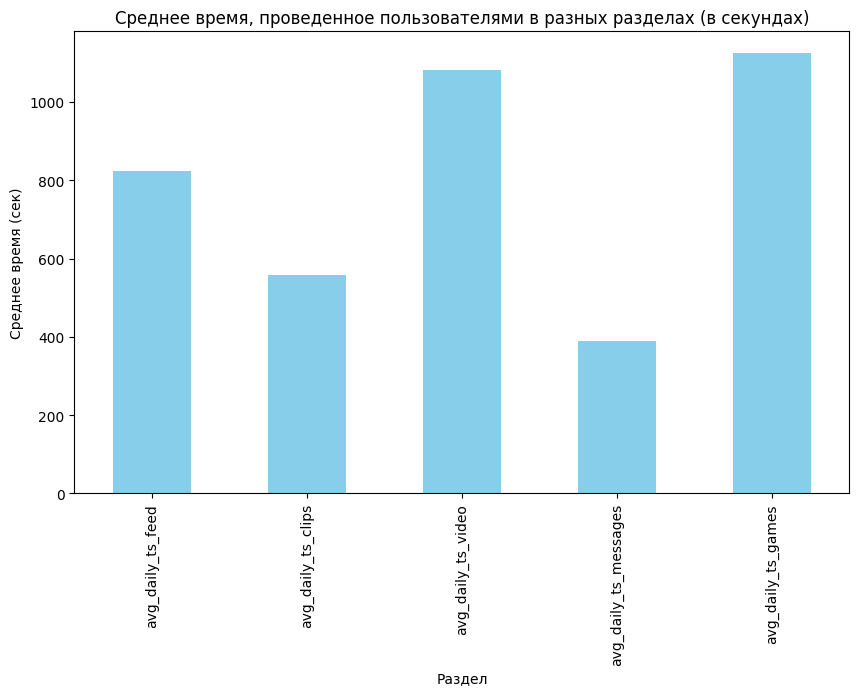

In [7]:
# Среднее время, проведенное пользователями в разных разделах
time_columns = [
    'avg_daily_ts_feed', 'avg_daily_ts_clips', 'avg_daily_ts_video', 
    'avg_daily_ts_messages', 'avg_daily_ts_games'
]

# Построим график
plt.figure(figsize=(10, 6))
df[time_columns].mean().plot(kind='bar', color='skyblue')
plt.title('Среднее время, проведенное пользователями в разных разделах (в секундах)')
plt.xlabel('Раздел')
plt.ylabel('Среднее время (сек)')
plt.show()

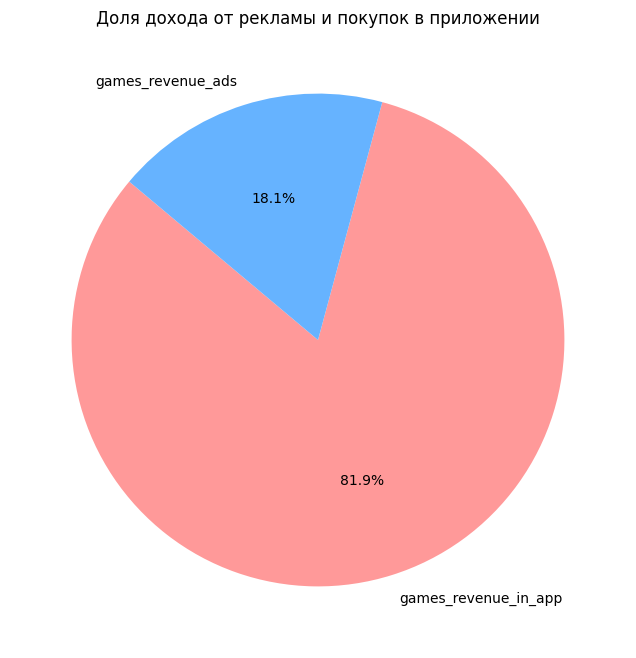

In [8]:
# Доход от разных источников
revenue_columns = ['games_revenue_in_app', 'games_revenue_ads']
revenue_means = df[revenue_columns].mean()

# Построим график
plt.figure(figsize=(8, 8))
plt.pie(revenue_means, labels=revenue_columns, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Доля дохода от рекламы и покупок в приложении')
plt.show()

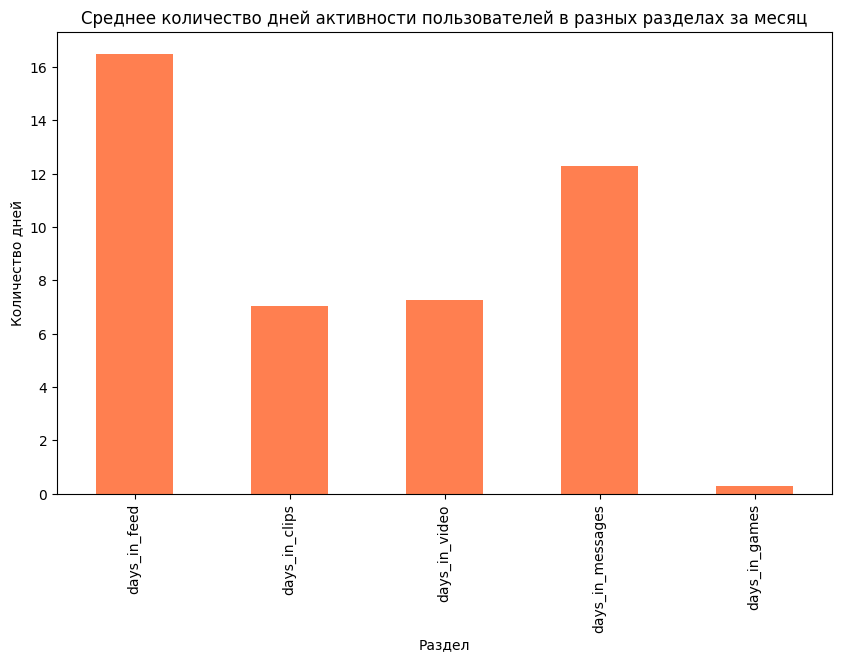

In [9]:
days_columns = [
    'days_in_feed', 'days_in_clips', 'days_in_video', 
    'days_in_messages', 'days_in_games'
]

# Построим график
plt.figure(figsize=(10, 6))
df[days_columns].mean().plot(kind='bar', color='coral')
plt.title('Среднее количество дней активности пользователей в разных разделах за месяц')
plt.xlabel('Раздел')
plt.ylabel('Количество дней')
plt.show()

C:\Users\slava\AppData\Local\Temp\ipykernel_2608\3122673790.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_data.index, y='avg_daily_ts', data=cluster_data, ax=axes[0], palette='viridis')
C:\Users\slava\AppData\Local\Temp\ipykernel_2608\3122673790.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_data.index, y='total_revenue_vk', data=cluster_data, ax=axes[1], palette='viridis')


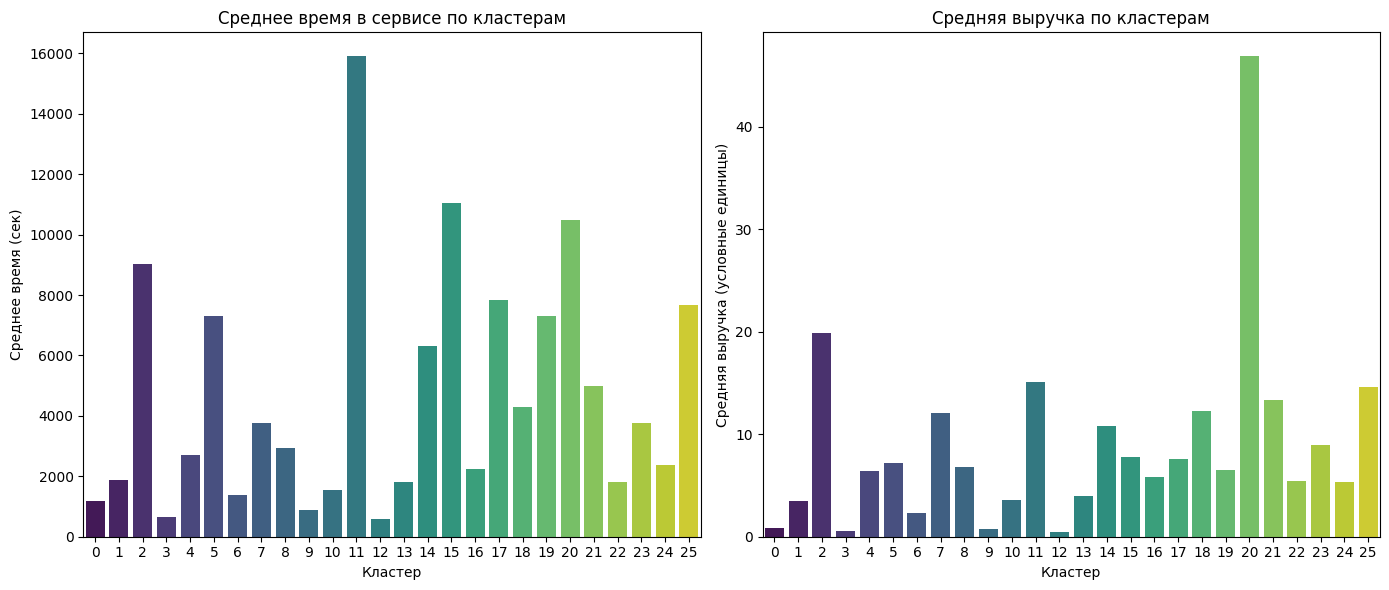

In [13]:
# Группировка данных по кластерам
cluster_data = df.groupby('final_cluster')[['avg_daily_ts', 'total_revenue_vk']].mean()

# Построим график
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Время, проведенное в сервисе по кластерам
sns.barplot(x=cluster_data.index, y='avg_daily_ts', data=cluster_data, ax=axes[0], palette='viridis')
axes[0].set_title('Среднее время в сервисе по кластерам')
axes[0].set_xlabel('Кластер')
axes[0].set_ylabel('Среднее время (сек)')

# Выручка по кластерам
sns.barplot(x=cluster_data.index, y='total_revenue_vk', data=cluster_data, ax=axes[1], palette='viridis')
axes[1].set_title('Средняя выручка по кластерам')
axes[1].set_xlabel('Кластер')
axes[1].set_ylabel('Средняя выручка (условные единицы)')

plt.tight_layout()
plt.show()

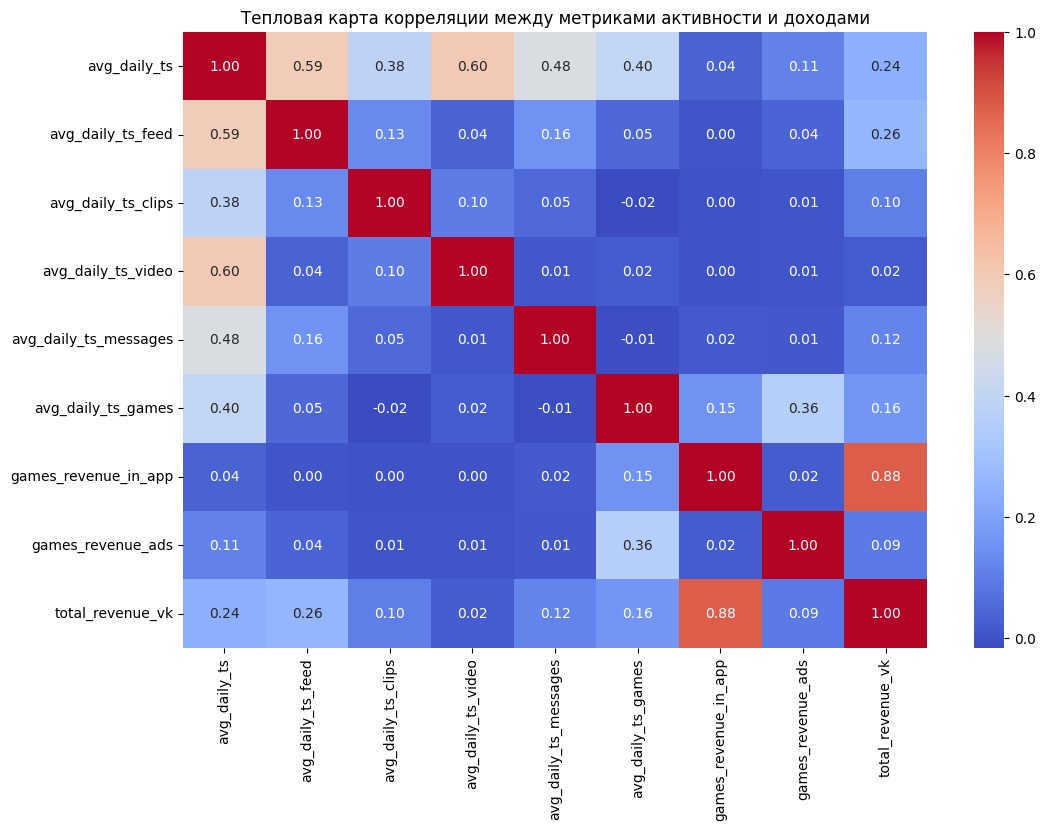

In [14]:
# Выбираем интересующие нас метрики для корреляции
correlation_columns = [
    'avg_daily_ts', 'avg_daily_ts_feed', 'avg_daily_ts_clips', 'avg_daily_ts_video', 
    'avg_daily_ts_messages', 'avg_daily_ts_games', 'games_revenue_in_app', 
    'games_revenue_ads', 'total_revenue_vk'
]

# Построим тепловую карту
plt.figure(figsize=(12, 8))
sns.heatmap(df[correlation_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта корреляции между метриками активности и доходами')
plt.show()